In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score as cvl
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn .metrics import roc_auc_score
!pip install category_encoders
import category_encoders as ce
from sklearn.metrics import cohen_kappa_score as chs
! pip install -U imbalanced-learn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

##Pre-processing the Dataset

In [62]:
from google.colab import drive
import numpy as np
import pandas as pd
#drive.mount('/content/drive')
# Create the dataframe
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS 540 Data Mining/flightandweather.csv')
df = pd.read_csv('flightandweather.csv')
dfcopy = df.copy()
#dfcopy.head()
df.shape

(421768, 31)

In [63]:
df.columns
#X features need to be weather conditions
#target (y) needs to be the Weather delay binary scale

Index(['Unnamed: 0', 'FL_DATE', 'TAIL_NUM', 'ORIGIN_STATE_NM', 'DEST_STATE_NM',
       'DEP_TIME', 'DEP_DELAY_NEW', 'ARR_TIME', 'ARR_DELAY_NEW', 'CANCELLED',
       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'count', 'try', 'time',
       'time1', 'time2', 'time3', 'timestamp', 'WindDirection', 'WindSpeed',
       'Humidity', 'visibility', 'temperature', 'presure', 'season'],
      dtype='object')

In [64]:
df = df.dropna(subset=["ARR_TIME","CANCELLED","ARR_DELAY_NEW","AIR_TIME"], axis=0)
print(df.isna().sum())
print(len(df))
df.drop(['FL_DATE','ORIGIN_STATE_NM','DEST_STATE_NM','ARR_TIME','CANCELLED','SECURITY_DELAY','NAS_DELAY','LATE_AIRCRAFT_DELAY','count','time1','time2','time3','timestamp','time','try','CARRIER_DELAY','DEP_DELAY_NEW','ARR_DELAY_NEW','TAIL_NUM','DEP_TIME'], axis = 1)

Unnamed: 0                  0
FL_DATE                     0
TAIL_NUM                    0
ORIGIN_STATE_NM             0
DEST_STATE_NM               0
DEP_TIME                    0
DEP_DELAY_NEW               0
ARR_TIME                    0
ARR_DELAY_NEW               0
CANCELLED                   0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY          351997
WEATHER_DELAY          351997
NAS_DELAY              351997
SECURITY_DELAY         351997
LATE_AIRCRAFT_DELAY    351997
count                       0
try                         0
time                        0
time1                       0
time2                      48
time3                      48
timestamp                  48
WindDirection            3380
WindSpeed                1347
Humidity                 1270
visibility               1270
temperature              1270
presure                  3768
season                      0
dtype: int64
417959


,Unnamed: 0,AIR_TIME,DISTANCE,WEATHER_DELAY,WindDirection,WindSpeed,Humidity,visibility,temperature,presure,season
0,0,84.0,563,NaN,300.0,14.0,68.0,10.0,46.0,28.00,1
1,1,85.0,563,NaN,310.0,8.0,71.0,10.0,47.0,29.00,1
2,2,88.0,563,NaN,100.0,5.0,74.0,10.0,50.0,29.00,1
3,3,88.0,563,NaN,240.0,7.0,77.0,10.0,54.0,29.00,1
4,4,89.0,563,NaN,310.0,13.0,51.0,10.0,43.0,29.00,1
...,...,...,...,...,...,...,...,...,...,...,...
421763,421763,87.0,581,NaN,280.0,9.0,73.0,10.0,40.0,28.88,4
421764,421764,93.0,760,NaN,300.0,17.0,63.0,10.0,43.0,28.94,4
421765,421765,83.0,581,NaN,270.0,16.0,36.0,10.0,56.0,28.89,4
421766,421766,101.0,760,NaN,270.0,11.0,41.0,10.0,50.0,28.89,4


In [65]:
df = df.loc[:, ['WindDirection','WindSpeed','Humidity','visibility','temperature','presure','season','WEATHER_DELAY']]
df.dropna(how='any', axis=0)

,WindDirection,WindSpeed,Humidity,visibility,temperature,presure,season,WEATHER_DELAY
6,90.0,9.0,57.0,10.00,35.0,29.00,1,0.0
10,350.0,13.0,70.0,10.00,36.0,29.00,1,0.0
14,160.0,10.0,96.0,1.00,55.0,28.00,1,0.0
17,110.0,14.0,32.0,10.00,34.0,29.00,1,0.0
18,120.0,9.0,80.0,8.00,48.0,29.00,1,0.0
...,...,...,...,...,...,...,...,...
421754,260.0,9.0,38.0,10.00,60.0,28.78,4,0.0
421755,280.0,13.0,47.0,9.94,52.0,28.82,4,0.0
421758,270.0,10.0,38.0,10.00,55.0,28.81,4,0.0
421759,270.0,15.0,50.0,10.00,58.0,28.82,4,0.0


In [66]:
len(df)

417959

In [67]:
X = df.loc[:, ['WindDirection','WindSpeed','Humidity','visibility','temperature','presure','season']]
y = df.loc[:, 'WEATHER_DELAY']

In [68]:
y

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
421763   NaN
421764   NaN
421765   NaN
421766   NaN
421767   NaN
Name: WEATHER_DELAY, Length: 417959, dtype: float64

In [69]:
print(X.isnull().sum())
print(y.isnull().sum())

WindDirection    3380
WindSpeed        1347
Humidity         1270
visibility       1270
temperature      1270
presure          3768
season              0
dtype: int64
351997


In [70]:
missing_values = X.isnull().sum()
for i in missing_values:
  if i >= 0.0:
    X.interpolate(method = 'linear', inplace = True)
X = X.values
print(X)

[[300.    14.    68.   ...  46.    28.     1.  ]
 [310.     8.    71.   ...  47.    29.     1.  ]
 [100.     5.    74.   ...  50.    29.     1.  ]
 ...
 [270.    16.    36.   ...  56.    28.89   4.  ]
 [270.    11.    41.   ...  50.    28.89   4.  ]
 [300.    17.    63.   ...  43.    28.94   4.  ]]


In [71]:
print(len(X))
print(len(y))
type(y)
type(X)

417959
417959


numpy.ndarray

In [72]:
Y = []
for i in y:
  if math.isnan(i):
    Y.append(0)
  else:
    if i >= 15.0:
      Y.append(1)
    if i < 15.00:
      Y.append(0)
y = Y

In [73]:
y = pd.DataFrame(data=y,columns=['Weather Delay'])
X1 = X
y1 = y
print(len(y))
print(y['Weather Delay'].value_counts(1))
print(y['Weather Delay'].value_counts(0))

417959
Weather Delay
0    0.993475
1    0.006525
Name: proportion, dtype: float64
Weather Delay
0    415232
1      2727
Name: count, dtype: int64


##Over-Sampling Models

Weather Delay
0                415232
1                  2727
Name: count, dtype: int64


<Axes: ylabel='count'>

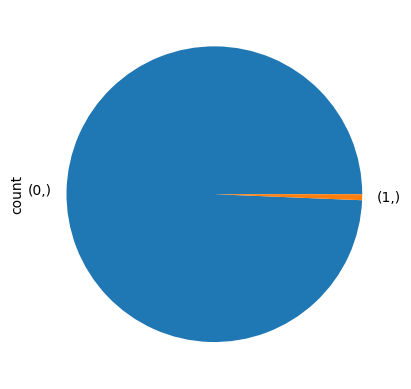

In [74]:
print(y.value_counts())
y.value_counts().plot.pie()

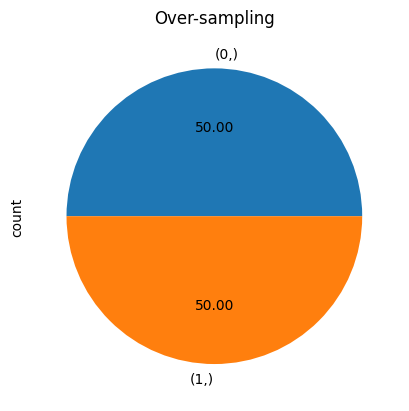

In [75]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 1, random_state = 47)
X_res, y_res = ros.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [76]:
print(len(X_res))
print(len(y_res))

830464
830464


In [77]:
X = X_res
y = y_res
X = pd.DataFrame(data=X,columns = ['WindDirection','WindSpeed','Humidity','visibility','temperature','presure','season'])
y = pd.DataFrame(data=y,columns=['Weather Delay'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .30,random_state = 47, stratify=y)

In [78]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(type(X))
print(type(y))

581324
581324
249140
249140
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


##K's Nearest Neighbors Classifier

In [79]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
knn.fit(X_train, y_train)

# Predicting the Train set results
y_pred = knn.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
precision, recall, fscore, support = score(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy:.4f}')
auc = np.round(roc_auc_score(y_test, y_pred), 3)
print("Auc for our data is {}".format(auc))
print('Kappa Stat:',chs(y_test, y_pred))

[[104998  19572]
 [  7564 117006]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.89    124570
           1       0.86      0.94      0.90    124570

    accuracy                           0.89    249140
   macro avg       0.89      0.89      0.89    249140
weighted avg       0.89      0.89      0.89    249140

Accuracy: 0.8911
Auc for our data is 0.891
Kappa Stat: 0.7821626394798106


##Extra Tree Classifier

In [82]:
# Initialize the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=47)

# Fit the model on the training data
clf = et_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = et_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Accuracy: {accuracy:.4f}')
print('Kappa Stat:',chs(y_test, y_pred))
print('Classification Report:')
print(report)


Accuracy: 0.9104
Kappa Stat: 0.8207995504535602
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    124570
           1       0.85      1.00      0.92    124570

    accuracy                           0.91    249140
   macro avg       0.92      0.91      0.91    249140
weighted avg       0.92      0.91      0.91    249140



8 fold cross-validation: [0.9098478  0.90825145 0.9075909  0.90874687 0.90908966 0.90899333
 0.90827771 0.90807129]


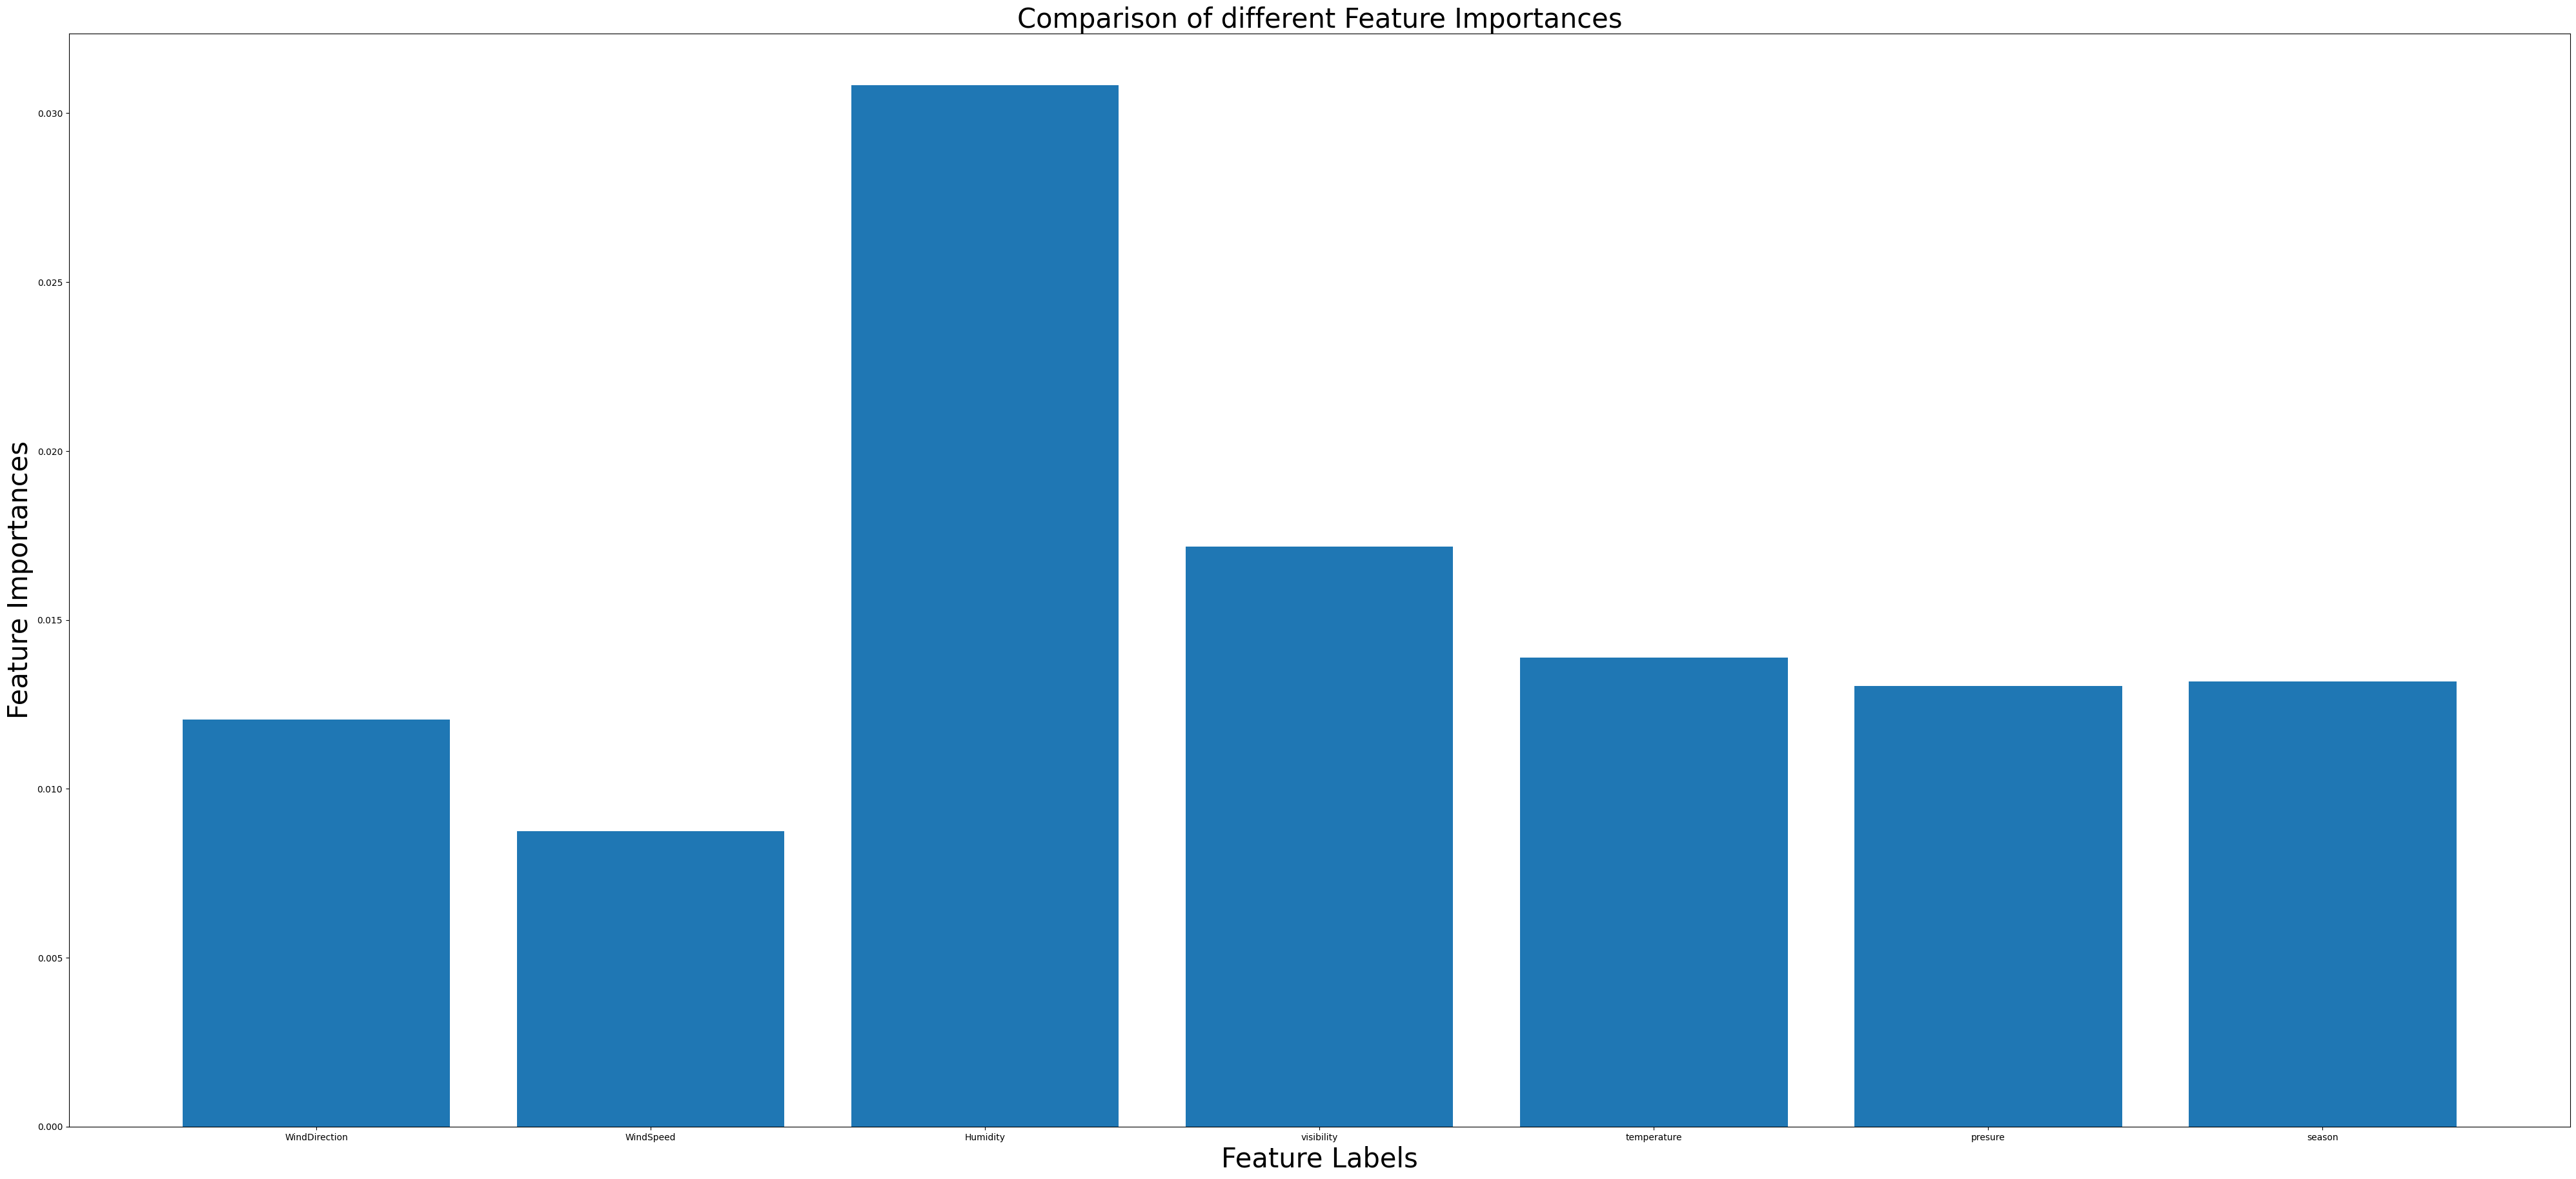

In [83]:

# Computing the importance of each feature
feature_importance = et_classifier.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        et_classifier.estimators_],
                                        axis = 0)
print('8 fold cross-validation:',cvl(clf, X_train, y_train, cv=8))
plt.figure(figsize=(50,22))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels', fontsize = 30)
plt.ylabel('Feature Importances', fontsize = 30)
plt.title('Comparison of different Feature Importances', fontsize = 30)
plt.show()

##Decision Tree Classifier

In [84]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state = 47)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cv_scores = cvl(clf, X_train, y_train, cv=5)
# Perform cross-validation

# Print the different scores
print(cv_scores)
print('Mean of Cross-Validation Scores:',cv_scores.mean())
print('Standard Deviation:',cv_scores.std())
print('Confusion Matrix')
print(cm)
print(classification_report(y_test, y_pred))
auc = np.round(roc_auc_score(y_test, y_pred), 3)
print("Auc for our data is {}".format(auc))
print('Kappa Stat:',chs(y_test, y_pred))

[0.68913259 0.68783383 0.69035393 0.68717155 0.68725487]
Mean of Cross-Validation Scores: 0.6883493523500078
Standard Deviation: 0.0012233299592861336
Confusion Matrix
[[104998  19572]
 [  7564 117006]]
              precision    recall  f1-score   support

           0       0.66      0.77      0.71    124570
           1       0.73      0.60      0.66    124570

    accuracy                           0.69    249140
   macro avg       0.69      0.69      0.68    249140
weighted avg       0.69      0.69      0.68    249140

Auc for our data is 0.686
Kappa Stat: 0.3727783575499719


##Ada Boost

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score as chs

# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'sqrt', 'log2']
}

# Create a Decision Tree Classifier
weak_classifier = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=weak_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Create an AdaBoostClassifier object using the best estimator
adaboost_model = AdaBoostClassifier(estimator=best_estimator, n_estimators=3)

# Fit the AdaBoostClassifier object to the training data
adaboost_model.fit(X_train, y_train)

# Predict the training data
y_pred = adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
# Calculate Cohen's Kappa
kappa_stat = chs(y_test, y_pred)
print(f'Kappa Stat: {kappa_stat:.4f}')


Accuracy: 0.7319
              precision    recall  f1-score   support

           0       0.71      0.79      0.75    124570
           1       0.76      0.68      0.72    124570

    accuracy                           0.73    249140
   macro avg       0.73      0.73      0.73    249140
weighted avg       0.73      0.73      0.73    249140

Kappa Stat: 0.4637


##Under-sampling models

5454 5454


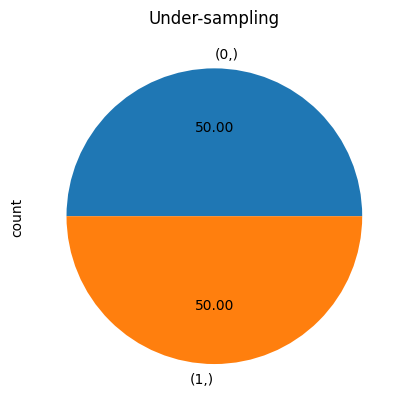

In [86]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1, random_state = 47)
X_res, y_res = rus.fit_resample(X1, y1)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")
X = X_res
y = y_res
print((len(X)),len(y))

##Extra Trees Classifier

In [87]:
X = pd.DataFrame(data=X,columns = ['WindDirection','WindSpeed','Humidity','visibility','temperature','presure','season'])
y = pd.DataFrame(data=y,columns=['Weather Delay'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .30,random_state = 47, stratify=y)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=47)

# Fit the model on the training data
clf = et_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = et_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.7019
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       818
           1       0.72      0.67      0.69       819

    accuracy                           0.70      1637
   macro avg       0.70      0.70      0.70      1637
weighted avg       0.70      0.70      0.70      1637



##Ada boost

In [88]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'sqrt', 'log2']
}

# Create a Decision Tree Classifier
weak_classifier = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=weak_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Create an AdaBoostClassifier object using the best estimator
adaboost_model = AdaBoostClassifier(estimator=best_estimator, n_estimators=3)

# Fit the AdaBoostClassifier object to the training data
adaboost_model.fit(X_train, y_train)

# Predict the training data
y_pred = adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
# Calculate Cohen's Kappa
kappa_stat = chs(y_test, y_pred)
print(f'Kappa Stat: {kappa_stat:.4f}')

Accuracy: 0.6878
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       818
           1       0.69      0.69      0.69       819

    accuracy                           0.69      1637
   macro avg       0.69      0.69      0.69      1637
weighted avg       0.69      0.69      0.69      1637

Kappa Stat: 0.3757


#Conclusion

The oversampled synthetic data to balance the dataset provides a much more accurate prediction when using any of the models within this code. The Extra Trees Classifier has outperformed the other models, and it shows that the most impactful feature in predicting a weather delay is Humidity.